### Phytophthora spp. Data Analysis
This notebook analyzes genomic and ecological traits of *Phytophthora* species from a created dataset containing extensive information found from PhytophthoraDB, NCBI Taxonomy.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('phyto.csv')
df.head()


,Species Name,NCBI Taxon ID,Genome Size (Mb),Genome Assencion Number (RefSeq or GenBank),Reference genome NCBI,Number of Contigs/Scaffolds,GC content (%),Common Host(s),Host Type,Geographic Origin,Disease caused,Lifestyle,Publication/Source,Genome URL,Notes
0,Phytophthora palmivora,4796.0,107.8,GCA_002911725.1,ASM221536v1,"28,622",49.0,Theobroma cacao,Plant,"Africa, South America, Asia",black pod rot,hemibiotrophic,NCBI,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,200+ hosts
1,Phytophthora infestans,4787.0,228.5,GCF_000142945.1,ASM14294v1,"4,921",51.0,"Theobroma cacao, Solanum tuberosum, Solanum ly...",Plant,South America,"downy mildews, potato late blight agent",hemibiotrophic,NCBI,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,NaN
2,Phytophthora megakarya,4795.0,101.5,GCA_002215365.1,ASM221536v1,"27,089",49.0,Theobroma cacao,Plant,West and Central Africa,black pod rot,hemibiotrophic,NCBI,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,NaN
3,Phytophthora sojae,67593.0,82.6,GCA_000149755.2,NaN,"5,578",54.5,Soybean,Plant,Global (tropics),"Soybean chlorotic mottle virus, downy mildew",hemibiotrophic,NCBI,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Wide host range (100+)
4,Phytophthora theobromicola,2811959.0,NaN,NaN,NaN,NaN,NaN,Theobroma cacao,Plant,Brazil,"Downy mildew, black pod disease",NaN,https://idtools.org/phytophthora/index.cfm?ent...,NaN,No full sequence in NCBI


## Data Cleaning
As of now, db not complete - cant run genome size comparison and size vs lifestyle


In [ ]:
# Convert relevant columns to numeric
df['Genome Size (Mb)'] = pd.to_numeric(df['Genome Size (Mb)'], errors='coerce')
df['GC content (%)'] = pd.to_numeric(df['GC content (%)'], errors='coerce')


## Genome Size vs. GC Content

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='GC content (%)', y='Genome Size (Mb)', hue='Species Name')
plt.title('Genome Size vs. GC Content')
plt.xlabel('GC Content (%)')
plt.ylabel('Genome Size (Mb)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Genome Size by Host Type


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Host Type', y='Genome Size (Mb)')
plt.title('Genome Size by Host Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Statistical Comparison: Genome Size by Lifestyle


In [ ]:
# Drop NA for lifestyle comparison
df_lifestyle = df.dropna(subset=['Lifestyle'])
lifestyles = df_lifestyle['Lifestyle'].unique()
if len(lifestyles) == 2:
    group1 = df_lifestyle[df_lifestyle['Lifestyle'] == lifestyles[0]]['Genome Size (Mb)']
    group2 = df_lifestyle[df_lifestyle['Lifestyle'] == lifestyles[1]]['Genome Size (Mb)']
    t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
    print(f"T-test result between {lifestyles[0]} and {lifestyles[1]}: p = {p_val:.4f}")
else:
    print("More than two lifestyles present, consider using ANOVA.")


/tmp/ipykernel_3181447/124385230.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_counts, x='Count', y='Geographic Origin', palette='viridis')


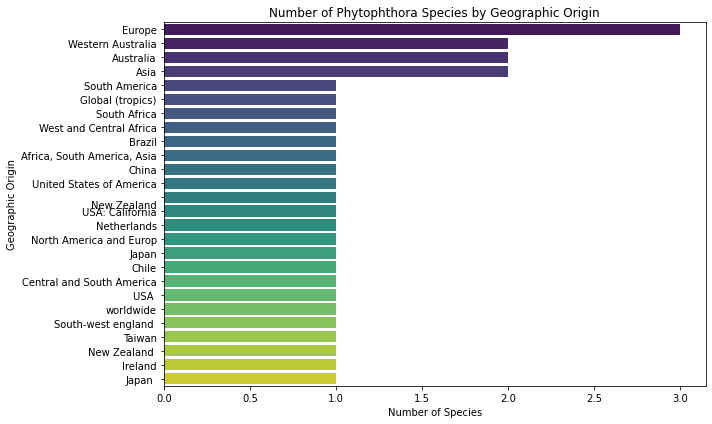

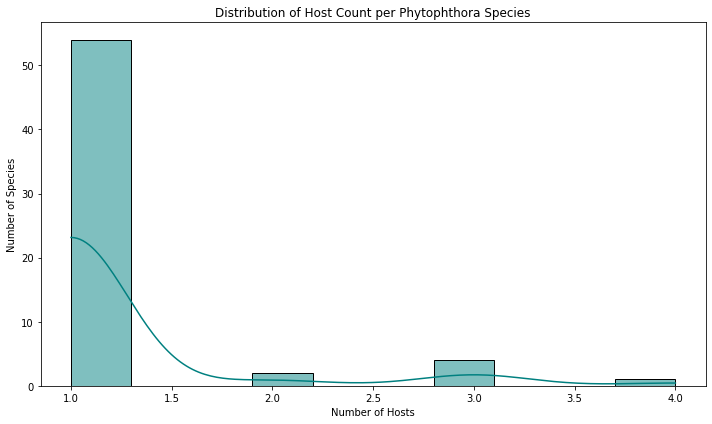

/tmp/ipykernel_3181447/124385230.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disease_counts.head(10), x='Count', y='Disease', palette='magma')


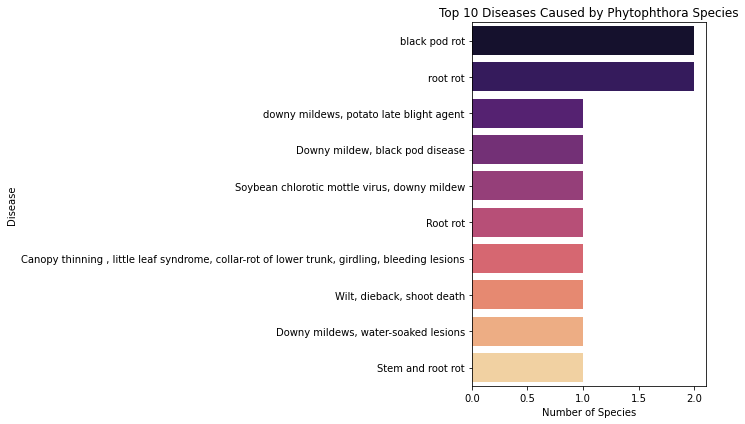

In [9]:
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Recalculate the processed fields
geo_counts = df['Geographic Origin'].value_counts().reset_index()
geo_counts.columns = ['Geographic Origin', 'Count']

df['Host Count'] = df['Common Host(s)'].apply(lambda x: len(str(x).split(',')))

disease_counts = df['Disease caused'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']

# Plot 1: Geographic distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=geo_counts, x='Count', y='Geographic Origin', palette='viridis')
plt.title('Number of Phytophthora Species by Geographic Origin')
plt.xlabel('Number of Species')
plt.ylabel('Geographic Origin')
plt.tight_layout()
plt.show()

# Plot 2: Number of different hosts per species
plt.figure(figsize=(10, 6))
sns.histplot(df['Host Count'], bins=10, kde=True, color='teal')
plt.title('Distribution of Host Count per Phytophthora Species')
plt.xlabel('Number of Hosts')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()

# Plot 3: Most common diseases caused
plt.figure(figsize=(10, 6))
sns.barplot(data=disease_counts.head(10), x='Count', y='Disease', palette='magma')
plt.title('Top 10 Diseases Caused by Phytophthora Species')
plt.xlabel('Number of Species')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud
text = " ".join(df['Common Host(s)'].dropna())
WordCloud().generate(text)
